# ADS 509 Sentiment Assignment

This notebook holds the Sentiment Assignment for Module 6 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In a previous assignment you put together Twitter data and lyrics data on two artists. In this assignment we apply sentiment analysis to those data sets. If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Blackboard. 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from string import punctuation

from nltk.corpus import stopwords

sw = stopwords.words("english")

/Users/roger.qiu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/roger.qiu/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [48]:
# Add any additional import statements you need here

# show everything when showing head
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# change `data_location` to the location of the folder on your machine.
data_location = "/Users/roger.qiu/Documents/other/code/USD/11. Applied Text Mining/ads-509/module_6/ads-tm-sentiment/"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

positive_words_file = "positive-words.txt"
negative_words_file = "negative-words.txt"
tidy_text_file = "tidytext_sentiments.txt"

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A Pandas data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [4]:
# Read in the lyrics data

In [5]:
import os
print("Current Working Directory:", os.getcwd())

Current Working Directory: /Users/roger.qiu/Documents/other/code/USD/11. Applied Text Mining/ads-509/module_6/ads-tm-sentiment


In [6]:
# set subdirectory path
directory_path = "lyrics/cher/"

# create empty list to store filenames
filenames = []

# for every filename in the directory path, add it to filesnames
for filename in os.listdir(directory_path):
    filenames.append(filename)

filenames[:5]

['cher_comeandstaywithme.txt',
 'cher_pirate.txt',
 'cher_stars.txt',
 'cher_thesedays.txt',
 'cher_lovesohigh.txt']

In [7]:
# create list for full filepaths
file_paths = []

# for each filepath plus file name, append to filepaths
for filename in filenames:
    file_path = os.path.join(directory_path, filename)
    file_paths.append(file_path)

file_paths[:5]

['lyrics/cher/cher_comeandstaywithme.txt',
 'lyrics/cher/cher_pirate.txt',
 'lyrics/cher/cher_stars.txt',
 'lyrics/cher/cher_thesedays.txt',
 'lyrics/cher/cher_lovesohigh.txt']

In [8]:
# empty data list to store all the text data
data = []

# for each file path, open the text file, read it, strip trailing spaces and sppend to data as a list
for file_path in file_paths:    
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().strip()
        data.append([filename, text])

data[:1]

[['cher_classified1a.txt',
  '"Come And Stay With Me"\n\n\n\nI\'ll send away all my false pride\nAnd I\'ll forsake all of my life\nYes I\'ll be as true as true can be\nIf you\'ll come and stay with me\n\nAll lovers of the past, I\'ll leave behind\nThey\'ll never be another on my mind\nI\'ll do all I can so you\'ll feel free\nIf you\'ll come and stay with me\n\nThe promise I made most faithfully\nI\'ll keep still if you decide to leave\nI\'ll try and see that you have all you need\nIf you\'ll come and stay with me\n\nYes I\'ll be as true as true can be\nIf you\'ll come and stay with me\n\nLive a life no others have ever known\nBut I know you think that I\'m hardly grown\nOh thank God at last and finally\nI can see you\'re gonna stay with me\nI can see you\'re gonna stay with me']]

In [9]:
# create a dataframe based on the data lists
df_cher = pd.DataFrame(data, columns=['Filename', 'Text'])

df_cher[:1]

,Filename,Text
0,cher_classified1a.txt,"""Come And Stay With Me""\n\n\n\nI'll send away all my false pride\nAnd I'll forsake all of my life\nYes I'll be as true as true can be\nIf you'll come and stay with me\n\nAll lovers of the past, I'll leave behind\nThey'll never be another on my mind\nI'll do all I can so you'll feel free\nIf you'll come and stay with me\n\nThe promise I made most faithfully\nI'll keep still if you decide to leave\nI'll try and see that you have all you need\nIf you'll come and stay with me\n\nYes I'll be as true as true can be\nIf you'll come and stay with me\n\nLive a life no others have ever known\nBut I know you think that I'm hardly grown\nOh thank God at last and finally\nI can see you're gonna stay with me\nI can see you're gonna stay with me"


In [10]:
# check the shape
df_cher.shape

(316, 2)

In [11]:
# now do the same for robyn

directory_path = "lyrics/robyn/"

filenames = []

for filename in os.listdir(directory_path):
    filenames.append(filename)

file_paths = []

for filename in filenames:
    file_path = os.path.join(directory_path, filename)
    file_paths.append(file_path)

data = []

for file_path in file_paths:    
    with open(file_path, 'r', encoding='utf-8') as file:
        text = file.read().strip()
        data.append([filename, text])

df_robyn = pd.DataFrame(data, columns=['Filename', 'Text'])
df_robyn[:1]

,Filename,Text
0,robyn_play.txt,"""Include Me Out""\n\n\n\nIt is really very simple\nJust a single pulse, repeated at a regular interval\n\nMmm, hmm\nDon't include me out, no\nDon't include me out\n\nOne time for the records and the hits\nTwo for your money-maker, shake, boom\nThree times for the lucky and the dead\n\nOne time for the sorry and safe\nTwo for the beggar and his company\nThree times for the sinner and the saint\n\nYeah, bow down all you wicked and the vain\nBow to the miracle, the em, na, na\nThree times and the devil will be gone\n\nOne time for the fire, bring it on\nTwo for the boogie, gotta bang the beat\nThree times for the ladies, show me some love\n\nTalking 'bout everyone, every day, all day\n\nAnd if your world should fall apart\nThere's plenty room inside my heart\nJust don't include me out\nDon't include me out\n\nAnd if your world should fall apart\nI still got room inside my heart\nJust don't include me out\nDon't include me out, d-d-don't include me out\n\nAll hail to the mamas who hold it down\nHail to the pillar of the family\nThis one's for the granny, take a bow\n\nOne time for the crazy and the bent\nCome on, all you trannies click your heels for me\nAll praise the fugeses and the gems\n\nTalking 'bout everyone, every day, all day, oh yeah\n\nAnd if your world should fall apart\nThere's plenty room inside my heart\nJust don't include me out\nJust don't include me out\n\nAnd if your world should fall apart\nI still got room inside my heart\nJust don't include me out\nDon't include me out, d-d-don't include me out\n\nCan I get a beat, beat for all of my watchamacallits\nDoing whatever and with whoever they like?\nCan I get a beat, beat for all of my watchamacallits\nDoing whatever and with whoever they like?\n\nCan I get a bam, bam for all of my watchamacallits\nDoing whatever and with whoever they like?\nCan I get a bam, bam for all of my watchamacallits\nDoing whatever and with whoever they like?\n\nI'm talking about everyone, every day, all day, hey\n\nAnd if your world should fall apart\nThere's plenty room inside my heart\nJust don't include me out\nDon't include me out\n\nAnd if your world should fall apart\nI still got room inside my heart\nJust don't include me out\nDon't include me out\n\nAnd if your world should fall apart\nThere's plenty room inside my heart\nJust don't include me out, hey, hey\n\nAnd if your world should fall apart\nI still got room inside my heart, yeah\nJust don't include me out, hey"


In [12]:
df_robyn.shape

(104, 2)

In [13]:
# union the two df's together so we have one complete df for both artists
df_lyrics = pd.concat([df_cher, df_robyn], ignore_index=True)
df_lyrics.shape

(420, 2)

In [14]:
# Read in the twitter data

#### This part crashes whenever I try to run it so it will not work

#### So instead, I will just take text from a single file as an example

In [57]:
cher_twitter = """
    screen_name	name	id	location	followers_count	friends_count	description
    hsmcnp	Country Girl	35152213		1302	1014	
    horrormomy	Jeny	742153090850164742	Earth	81	514	𝙿𝚛𝚘𝚞𝚍 𝚜𝚞𝚙𝚙𝚘𝚛𝚝𝚎𝚛 𝚘𝚏 𝚖𝚎𝚜𝚜𝚢 𝚋𝚞𝚗𝚜 & 𝚕𝚎𝚐𝚐𝚒𝚗𝚐𝚜
    anju79990584	anju	1496463006451974150		13	140	163㎝／愛かっぷ💜26歳🍒 工〇好きな女の子💓 フォローしてくれたらDMします🧡
    gallionjenna	J	3366479914		752	556	csu
    bcscomm	bcscomm	83915043	Washington, DC	888	2891	Writer @Washinformer @SpelmanCollege alumna #DCnative Award-winning journalist & PR pro @IABC Fellow & Past Chair IG: bcscomm Email: wibsiler@gmail.com
    liaochaoqun2	廖超群	1502787622376075264	Taiwan	2	390	
    Rodhandyjj	Art Vandalay 🇺🇦🇺🇦🇺🇦	1386454132022824962	Maine, USA	104	159	I’m unemployed and live with my parents. MOOPS!
    JackBianchi7	Jackson	1200870825953550336		0	7	zoowee mama
    MelbaBu81266475	Melba Burns	1492913469166743554		17	136	
    macryant900	SpyderRyder	3425156986	🇨🇦	628	794	Let the healing begin. Let us learn from the past. 🇨🇦 follower of #TheResistance
    notdevilanse	Amanda 😇	916870029123211264		13	110	do what thou wilt. 🖤✨
    dickgirIdiaries	dickgirldiaries	1098760805162471424		480	212	
    bloomingrx	Roxana M 🇺🇦🇨🇦	1489642891437817859	Delisle, Saskatchewan	16	163	Curious Canadian Contemplator. She/Her. Sexagenarian. We are here for each other!
    nurb43211	nurb4321	1502808896292937730		0	110	
    ERParker3	edieparker	16700926		7	236	
    m4ggots4br4ins	emma	1112046229985218560	California, USA	40	52	
    eyoTTracy	Tracy Nicole	1449604704049065984		18	368	
    Taliaasaurus	Σκουπίδια	332397786		134	314	(She/Her/Hers) Feminist. LGBTQ+. BLM. Mental health advocate. Do something nice for somebody today :)
    pastone61	piper	840558213690982400	United States	4	149	
    luzguardado_	♡	169206990		535	251	IG: @browsbyluz_
    gldsgirl1	Phyllis Huell	2247883146		1	189	
    Giselle99831932	Giselle	1349049200105955329		0	30	BLM I LOVE 80'S VIVA MÉXICO
    Ok1Tooshort	N.J.	2892672755	Limbo	105	314	Ubuntu to Mudita 🧩 INFP🌻
    JesseMFJones	Jesse Jones	3406666818	Fort McMurray, Alberta	39	201	I'm just a guy, married, kids and constantly wonder what happened to my life? I expect you to understand. Oh yeah follow me okay.
    LauraDoty4	Laura Doty	1961305896		126	397	Dance yourself clean. Saunas are nice too
    Vianca_MDO	Vee💕	1367375024	Traveling	889	484	Romanos 8:31 ✝️
    truthprevails56	SB2020	65521194	California, USA	5	81	Supporting from California, USA. Let the truth prevail.
    Jason_P82	Jason Pinkney	470068001	Meadow Lands, PA	122	752	I like cars, guitars, and sports...
    gracemwuah	Gracie	1286395280661725184	Eugene, OR	12	56	misanthrope asf
    violetmasseuse	V I O L E T ✧ ottawa	1219816548036227073	༺༻	1275	414	18 + ✧.* for those with a gentle heart and a wild soul ꕥ erotic masseuse
    RacyTracey	Harper	20960139	Sacramento, CA	162	1096	Triple Vaccinated Cyclist, Cancer Survivor, Caldor Fire survivor, Climate Change is real!
    petropolisfuI	petros	1246491934379499521	Portland, OR	0	108	Just some guy 🙃
    taylornelson43	Taylor (taylor’s version✨)	2356650962	Phoenix, AZ	1142	2132	she/hers • queer progressive organizer • hire me for comms or field pls • past: @arenasummit academy CM track @IAForWarren @CoeCollege @SwingLeft @PPACT @HRC
    Aprilmh19	April Hampton	1498406503107239950		5	74	
    KyleDHester	Kyle Hester is an Actor/ Filmmaker	138584469	Kyle of Hollywood	137657	143879	Actor/ Filmmaker .No quarter for racism. Films @preachersix. @themagicianfilm @zombiewashotgun @thechairhorror #Pagan. Happily married to Tracy Ray .
    ActuallyReal16	Real Person	1502266279352315906		1	128	Hi! I'm an actual, real person. Only one.
    maevesicles	Maeve	1061509267		153	87	
    AndyRLovesBalls	Andy Rose - Republicans Are Clearly Full Of Crap!!	1178663736288120835	Texas, USA	281	424	Andy Rose - I am not subscribing to your porn link! Don't DM me to. He/Him Republicanism is Fascism Save Our Democracy, Vote Democratic Progressive Anti-Bigot
    AdamTheeStan	CrackHeadBarbie	1363710785663488001		10	37	He/Him | 🏳️‍🌈 | AvaLance worshipper | Legends Whore | TUA☂️ | Runaways | Legacies | Wanda Stan🔴
    bafwinn	A F 🔥	977945404921733121		31	197	BULLSHIT AF🔥
    fierrofamilylaw	Gerard A Fierro	49227891	Los Angeles	120	268	Penn State Alumnus 1985 USC Law Center J.D. 1988 State Bar of California 1988
    MikeGaryCole	Mike Gary Cole	63761468	Nelson, BC	193	90	crossfit guru. civil war historian (all countries). unethically monogamous. vaxxed with every brand. all pronouns offend me. live. laugh. loiter.
    StarBlue63	Star	1020834629153157120		3	41	
    DLMB777	Denise Bélanger	735569574	Ottawa	11	174	I draw the line at stinky tofu. Lives in the nice apartment over a meth lab. Opinions are my own.
    BarbaraShoaf4	Barbara Shoaf	1468743891729850371		4	4	
    Cierra__George	Cierra George	1502799105663320068		10	251	Environmentalist | Fashion and Beauty Enthusiast | Goofball | Proud Nerd | Foodie | Cat Mom
    APennyValentine	Anne Valentine	1496491546417537034		51	679	Working mother, runner / OTFer, sometimes singer, never misses a meal. Food recommendations always accepted.
    teresa199802	Terenice	2905798337		227	265	miren a mi perrito querido
    mcarabal	living	35379608	Planet Earth	154	253	love is my choice 🌎
"""

In [59]:
robyn_twitter = """
    screen_name	name	id	location	followers_count	friends_count	description
    AngelxoArts	Angelxo	1424055675030806529	Zacatlan, Puebla, Mexico	29	535	"I love chill" •Facebook / Instagram / SoundCloud: AngelxoArts• https://t.co/447okKLKzA…
    songsfornikola	johnny	1502717352575651840		6	318	books, movies, music, nature & TV shows. OG Sweetee since '12 thanks to YouTube recommending 'This Feeling' on my homepage ♥️
    thibaud_lola	Thibaud Lola	1502407708246478852		3	69	(Am)auteur en herbe 🌱 - juriste en paille 🤡 - Ami des fleurs 🌸🌈 (sans la main verte) - music & books - #morecomingsoon... (si on en voit le bout)
    KyleSew2112	Kyle S 🌹🇬🇧🇺🇦	3423966821	South East London	1258	3444	This Twitter profile is full of sarcasm and rants with the occasional moan, dont like me dont follow me! KLF Stan Account Aspiring Youth Council rep
    MusiFlo	MusiFlo	3324069364	Canada	470	1706	Flora Youssef - Blogger & Founder Posting review articles about the latest music 🎵 https://t.co/dx4hoIom7T https://t.co/KsplT6mZzs
    Deyshaw30231780	Deyshawn	1502598892885626881		0	2	
    thefelourfog	the velour fog	279534119	uk	26	71	
    AnneMarieBarr7	Anne Marie Barr	1186254594885726209	United Kingdom	3	173	
    imteddymykaels	Tra$$hy	1317373838817169408	They/them	1351	3436	Recording Artist / songwriter 🌈 Fashion Stylist of The Floral House Boutique / CEO Of Arcade Mode Records / Actor
    CheesusOnToast	my son is also named Bort 🇳🇿 🦖🐧🥑	1529689122	New Zealand	101	1449	
    thequeerstriver	Mauricio Garcia	1451033113539264513	Chicago, IL	8	64	🇲🇽|🏳️‍🌈
    BexThreads	BexThreads	87682061	Brisbane, Queensland	653	3094	🚀🐕Check 👀t SnoopDogeMeme 🐕🚀 🔥🔥🐢 T M N T 🐢🔥🔥 Music enthusiast! Musician. Writer. Artist. Humanitarian. Animal lover. NFT Lover.
    stegzo	Stephen Docherty	221097848		42	129	References Available Upon Request
    mfildes_peace	MichaelFildesPeace	1502407033911455749		2	57	
    ChiouCristal	Cristal Chiou	840010781676654592	Taipei City, Taiwan	4	210	DJ Cristal Chiou
    kristinaEntico2	kristina Enticott	748636524091162625	Cardiff, Wales	24	190	
    dizzyborden1972	Jodi Gemini	510904825	Omaha	18	337	Half mad Jade and shabby cabbie. Old and tired but at least I am immune to teargas. All Trek is good Trek. Doom Patrol is life.
    tangerinecream2	Tangerine Cream	901734229834215424		60	421	Bro.
    NickRevell317	Nick Revell	326586556	Indianapolis, Indiana	2043	1983	I'm the one the other side of the pillow got it from. Also, Assistant to the Taco Executive.
    Cam11235	Cameron Barné	844947136525557761	New York, NY	215	539	He/him - Now that things are opening back up...
    mcarracedo10	Manuel Carracedo Lantadilla	1501031032086224898		6	120	Cuenta alternativa 😊✌️🌈
    viktorstenhjem	Viktor Stenhjem 🇺🇦☮️	1387046322566356995	Munich, Bavaria	53	1253	A wrong note is insignificant, but to play without passion is unforgivable - LvB 🇪🇺
    MultiverseJC	JC 💯💜🌹💎	747556057	Multiverse	182	2070	I am water. #WorldOfWarcraft #HipHop #Underground. #Mainstream. #Money #Women #Weed I love jewelry but ain't got any. I'll change that when I make it. 🎧🙏
    alon_fruchter	Alon Fruchter	3284473406		196	458	עורך התרבות בדיגיטל של @kann_news
    JemimaColahan	Jemima Colahan	1502112563915415560		1	129	
    DanielFerrs	Daniel	1501956867853070338	Praia Grande São Paulo	0	133	Pokemon Go Trailer levei 50 More Ethan 525 milions of XP Shiny Collector
    em_____dash	Emily Suber 🇺🇦	17958282	LA	44	111	Art Director | Design (Graphic / Motion) | Art
    ThVanthong	vanthong Th	1501310052019290118		3	102	71022
    Sannelisabeth_	Sandra	1501998427978276865		1	33	
    AStickerman	Anthony Stickerman	1088598963886841856	Vancouver, British Columbia	32	320	Host of Stickin’ It with Anthony on YouTube. New video last Saturday of every month. Join me on my sticker-booking adventures! ▶️https://t.co/03IwdOrGyw
    1981_jpg	1981	1501908849745399812		14	423	
    omgxditskathy	Katherine	1096994687343308800	Nutley 	3	28	My name is Kat. I love lamp.
    brookslb93	Larna Brooks	1182222934083022848		33	551	
    muleyong	Mule Yong	1460977013414580225		153	4514	Hi! I’m a metaverse money mule. While traveling around the world I collect game points and blog about cyber security art
    AdrianCanadrian	Adrian Bell Voiceovers🎙🎧🔊	28026701	The World	525	2701	https://t.co/K2cKzBkxVQ Voiceover Artist, Narrator, Commercial Voice Actor, Promo Voice, Broadcaster, Producer, Culinarian, Editor, Published Writer
    Douglas26178111	Douglas Hill	1490320621372416000	Currently Saudi Arabia 	2	81	Working man
    JimmyTonyFTW	Jimmy Tony	1499235040462475270		2	133	
    CuthbertSykes92	Twila ♍️	331142262	TW (5/6) ❤️	6044	4678	She/Her
    PostingCast	PostingCast	1492626491296796673		496	543	PostingCast, the cast that posts.
    sfoxxxx	Rafa	50548455	Lisbon, Portugal	252	216	Voce me dá gastrite!
    ApolloStar10	Ashley Foust	1501724294144954368		0	4	Inspector by day, Mother by night.
    MarScho4711	MarSch	1130851287199649798	Bez. Melk/Nö/AT/EU	122	477	🇫🇮🇸🇪🇪🇪🇱🇹🇱🇻🇬🇪🇲🇩🇵🇱🇺🇦 🖕🇷🇺🖕 Jahrgang: That's one small step for man; one giant leap for mankind.
    IrlTransport	UK & IRL	1321190770704027651		0	109	19hrs
    FikaduZarito	Zarito Fikadu	1501662213945401351		1	321	
    Hannahannahej	Hannah	1501653422789046279		0	23	
    zidekit	Neo MATRIX	1500221537605107718		0	3	
    joaquinxcx	joaquin • CRASH MARCH 18!🧣	1268672694821806080	he/they | minor	64	506	💛 stream sawayama pls • cupcakke follow! 💛
    kiefert	kiefert	262702889		8	94	
    MiloSHuang	Milo Huang	1489692727507927043		10	759	I'm either a Macintosh apple or Granny Smith your choice.
"""

In [16]:
# Read in the positive and negative words and the
# tidytext sentiment. Store these so that the positive
# words are associated with a score of +1 and negative words
# are associated with a score of -1. You can use a dataframe or a 
# dictionary for this.

# first, create the file paths
positive_words_path = data_location + positive_words_file
negative_words_path = data_location + negative_words_file
tidy_text_path = data_location + tidy_text_file

print(positive_words_path)
print(negative_words_path)
print(tidy_text_path)

/Users/roger.qiu/Documents/other/code/USD/11. Applied Text Mining/ads-509/module_6/ads-tm-sentiment/positive-words.txt
/Users/roger.qiu/Documents/other/code/USD/11. Applied Text Mining/ads-509/module_6/ads-tm-sentiment/negative-words.txt
/Users/roger.qiu/Documents/other/code/USD/11. Applied Text Mining/ads-509/module_6/ads-tm-sentiment/tidytext_sentiments.txt


In [17]:
# open positive words and split lines as words
with open(positive_words_path, 'r') as file:
    positive_words = file.read().splitlines()

# need to remove the initial sentences
list(positive_words)[:5]

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Positive',
 ';',
 '; This file contains a list of POSITIVE opinion words (or sentiment words).']

In [18]:
# remove the sentences that start with ';' as these are not words
positive_words = [word for word in positive_words if not word.startswith(';')]
positive_words[:5]

['', 'a+', 'abound', 'abounds', 'abundance']

In [19]:
# turn list into dictionary with a 1 as value
positive_dict = {word: 1 for word in positive_words}
list(positive_dict.items())[:5]

[('', 1), ('a+', 1), ('abound', 1), ('abounds', 1), ('abundance', 1)]

In [20]:
# now do the same with negative words and give them a score of -1 
with open(negative_words_path, 'r') as file:
    negative_words = [line.strip() for line in file]

negative_words = [word for word in negative_words if not word.startswith(';')]

negative_dict = {word: -1 for word in negative_words}
list(negative_dict.items())[:5]

[('', -1), ('2-faced', -1), ('2-faces', -1), ('abnormal', -1), ('abolish', -1)]

In [21]:
# combine both positive and negative words into one dictionary
sentiment_dict = {**positive_dict, **negative_dict}
list(sentiment_dict.items())[:5]

[('', -1), ('a+', 1), ('abound', 1), ('abounds', 1), ('abundance', 1)]

In [22]:
# read in tidytext sentiments
tidy_df = pd.read_csv(tidy_text_path, sep='\t')
tidy_df.head()

,word,sentiment,lexicon
0,abandon,negative,nrc
1,abandoned,negative,nrc
2,abandonment,negative,nrc
3,abba,positive,nrc
4,abduction,negative,nrc


In [23]:
# map the words in the tidy df to sentiment scores from the dict, if null, just put 0
tidy_df['sentiment_score'] = tidy_df['word'].map(sentiment_dict).fillna(0)
tidy_df.head()

,word,sentiment,lexicon,sentiment_score
0,abandon,negative,nrc,0.0
1,abandoned,negative,nrc,0.0
2,abandonment,negative,nrc,0.0
3,abba,positive,nrc,0.0
4,abduction,negative,nrc,0.0


In [24]:
# check where the score is not null
tidy_df[tidy_df['sentiment_score'].notna()].head()

,word,sentiment,lexicon,sentiment_score
0,abandon,negative,nrc,0.0
1,abandoned,negative,nrc,0.0
2,abandonment,negative,nrc,0.0
3,abba,positive,nrc,0.0
4,abduction,negative,nrc,0.0


In [25]:
# create a dictionary again from tidy_df for quick lookup
sentiment_dict = tidy_df.set_index('word')['sentiment_score'].to_dict()
list(sentiment_dict.items())[:20]

[('abandon', 0.0),
 ('abandoned', 0.0),
 ('abandonment', 0.0),
 ('abba', 0.0),
 ('abduction', 0.0),
 ('aberrant', 0.0),
 ('aberration', 0.0),
 ('abhor', 0.0),
 ('abhorrent', 0.0),
 ('ability', 0.0),
 ('abject', 0.0),
 ('abnormal', -1.0),
 ('abolish', -1.0),
 ('abolition', 0.0),
 ('abominable', -1.0),
 ('abomination', -1.0),
 ('abort', -1.0),
 ('abortion', 0.0),
 ('abortive', 0.0),
 ('abovementioned', 0.0)]

## Sentiment Analysis on Songs

In this section, score the sentiment for all the songs for both artists in your data set. Score the sentiment by manually calculating the sentiment using the combined lexicons provided in this repository. 

After you have calculated these sentiments, answer the questions at the end of this section.


In [26]:
# your code here

# create artists field based on if filename starts with cher or robyn
df_lyrics['Artist'] = df_lyrics['Filename'].apply(lambda x: 'cher' if x.startswith('cher_') else ('robyn'))
df_lyrics[:1]

,Filename,Text,Artist
0,cher_classified1a.txt,"""Come And Stay With Me""\n\n\n\nI'll send away all my false pride\nAnd I'll forsake all of my life\nYes I'll be as true as true can be\nIf you'll come and stay with me\n\nAll lovers of the past, I'll leave behind\nThey'll never be another on my mind\nI'll do all I can so you'll feel free\nIf you'll come and stay with me\n\nThe promise I made most faithfully\nI'll keep still if you decide to leave\nI'll try and see that you have all you need\nIf you'll come and stay with me\n\nYes I'll be as true as true can be\nIf you'll come and stay with me\n\nLive a life no others have ever known\nBut I know you think that I'm hardly grown\nOh thank God at last and finally\nI can see you're gonna stay with me\nI can see you're gonna stay with me",cher


In [27]:
# replace all the \n with a space and then concatenating them into one single line
df_lyrics['Text'] = df_lyrics['Text'].str.replace(r'\n+', ' ', regex=True).str.strip()
df_lyrics[:1]

,Filename,Text,Artist
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me",cher


In [29]:
# split texts on whitespace to create tokens
df_lyrics['Tokens'] = df_lyrics['Text'].str.split()
df_lyrics[:1]

,Filename,Text,Artist,Tokens
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me",cher,"[""Come, And, Stay, With, Me"", I'll, send, away, all, my, false, pride, And, I'll, forsake, all, of, my, life, Yes, I'll, be, as, true, as, true, can, be, If, you'll, come, and, stay, with, me, All, lovers, of, the, past,, I'll, leave, behind, They'll, never, be, another, on, my, mind, I'll, do, all, I, can, so, you'll, feel, free, If, you'll, come, and, stay, with, me, The, promise, I, made, most, faithfully, I'll, keep, still, if, you, decide, to, leave, I'll, try, and, see, that, you, have, all, you, need, If, you'll, come, and, stay, with, me, Yes, I'll, be, ...]"


In [30]:
# convert all the tokens to lowercase
# apply .lower() for each token in the tokens list
df_lyrics['Tokens'] = df_lyrics['Tokens'].apply(lambda tokens: [token.lower() for token in tokens])
df_lyrics[:1]

,Filename,Text,Artist,Tokens
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me",cher,"[""come, and, stay, with, me"", i'll, send, away, all, my, false, pride, and, i'll, forsake, all, of, my, life, yes, i'll, be, as, true, as, true, can, be, if, you'll, come, and, stay, with, me, all, lovers, of, the, past,, i'll, leave, behind, they'll, never, be, another, on, my, mind, i'll, do, all, i, can, so, you'll, feel, free, if, you'll, come, and, stay, with, me, the, promise, i, made, most, faithfully, i'll, keep, still, if, you, decide, to, leave, i'll, try, and, see, that, you, have, all, you, need, if, you'll, come, and, stay, with, me, yes, i'll, be, ...]"


In [31]:
# remove stop words from tokens
# cleaned tokens will be all the token in tokens as long as they are not in stopwords list
df_lyrics['Cleaned_Tokens'] = df_lyrics['Tokens'].apply(lambda tokens: [token for token in tokens if token not in sw])
df_lyrics[:1]

,Filename,Text,Artist,Tokens,Cleaned_Tokens
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me",cher,"[""come, and, stay, with, me"", i'll, send, away, all, my, false, pride, and, i'll, forsake, all, of, my, life, yes, i'll, be, as, true, as, true, can, be, if, you'll, come, and, stay, with, me, all, lovers, of, the, past,, i'll, leave, behind, they'll, never, be, another, on, my, mind, i'll, do, all, i, can, so, you'll, feel, free, if, you'll, come, and, stay, with, me, the, promise, i, made, most, faithfully, i'll, keep, still, if, you, decide, to, leave, i'll, try, and, see, that, you, have, all, you, need, if, you'll, come, and, stay, with, me, yes, i'll, be, ...]","[""come, stay, me"", i'll, send, away, false, pride, i'll, forsake, life, yes, i'll, true, true, come, stay, lovers, past,, i'll, leave, behind, they'll, never, another, mind, i'll, feel, free, come, stay, promise, made, faithfully, i'll, keep, still, decide, leave, i'll, try, see, need, come, stay, yes, i'll, true, true, come, stay, live, life, others, ever, known, know, think, i'm, hardly, grown, oh, thank, god, last, finally, see, gonna, stay, see, gonna, stay]"


In [32]:
# calculate sentiment for each song in df_lyrics manually

# create empty list to store score for each song
sentiment_scores = []

# go thourgh each record in df lyrics
for index, row in df_lyrics.iterrows():

    # tokens are the cleaned tokens list
    tokens = row['Cleaned_Tokens']

    # set initial score to 0
    sentiment_score = 0

    # for each token
    for token in tokens:

        # at the value of the word to the score 
        sentiment_score += sentiment_dict.get(token, 0)

    # append that score to the list
    sentiment_scores.append(sentiment_score)

sentiment_scores[:5]

[3.0, 12.0, -1.0, 0.0, 9.0]

In [33]:
# 420 scores, one for each song
len(sentiment_scores)

420

In [34]:
# add the scores to each record
df_lyrics['sentiment_score'] = sentiment_scores
df_lyrics[:1]

,Filename,Text,Artist,Tokens,Cleaned_Tokens,sentiment_score
0,cher_classified1a.txt,"""Come And Stay With Me"" I'll send away all my false pride And I'll forsake all of my life Yes I'll be as true as true can be If you'll come and stay with me All lovers of the past, I'll leave behind They'll never be another on my mind I'll do all I can so you'll feel free If you'll come and stay with me The promise I made most faithfully I'll keep still if you decide to leave I'll try and see that you have all you need If you'll come and stay with me Yes I'll be as true as true can be If you'll come and stay with me Live a life no others have ever known But I know you think that I'm hardly grown Oh thank God at last and finally I can see you're gonna stay with me I can see you're gonna stay with me",cher,"[""come, and, stay, with, me"", i'll, send, away, all, my, false, pride, and, i'll, forsake, all, of, my, life, yes, i'll, be, as, true, as, true, can, be, if, you'll, come, and, stay, with, me, all, lovers, of, the, past,, i'll, leave, behind, they'll, never, be, another, on, my, mind, i'll, do, all, i, can, so, you'll, feel, free, if, you'll, come, and, stay, with, me, the, promise, i, made, most, faithfully, i'll, keep, still, if, you, decide, to, leave, i'll, try, and, see, that, you, have, all, you, need, if, you'll, come, and, stay, with, me, yes, i'll, be, ...]","[""come, stay, me"", i'll, send, away, false, pride, i'll, forsake, life, yes, i'll, true, true, come, stay, lovers, past,, i'll, leave, behind, they'll, never, another, mind, i'll, feel, free, come, stay, promise, made, faithfully, i'll, keep, still, decide, leave, i'll, try, see, need, come, stay, yes, i'll, true, true, come, stay, live, life, others, ever, known, know, think, i'm, hardly, grown, oh, thank, god, last, finally, see, gonna, stay, see, gonna, stay]",3.0


In [35]:
# get the average sentiment per song for each artist
average_sentiment_per_artist = df_lyrics.groupby('Artist')['sentiment_score'].mean()
average_sentiment_per_artist

Artist
cher     3.113924
robyn    2.000000
Name: sentiment_score, dtype: float64

In [40]:
# find the three songs with the highest and lowest sentiments for each artist

# filter by artists
cher_songs = df_lyrics[df_lyrics['Artist'] == "cher"]
robyn_songs = df_lyrics[df_lyrics['Artist'] == "robyn"]

robyn_songs[:1]

,Filename,Text,Artist,Tokens,Cleaned_Tokens,sentiment_score
316,robyn_play.txt,"""Include Me Out"" It is really very simple Just a single pulse, repeated at a regular interval Mmm, hmm Don't include me out, no Don't include me out One time for the records and the hits Two for your money-maker, shake, boom Three times for the lucky and the dead One time for the sorry and safe Two for the beggar and his company Three times for the sinner and the saint Yeah, bow down all you wicked and the vain Bow to the miracle, the em, na, na Three times and the devil will be gone One time for the fire, bring it on Two for the boogie, gotta bang the beat Three times for the ladies, show me some love Talking 'bout everyone, every day, all day And if your world should fall apart There's plenty room inside my heart Just don't include me out Don't include me out And if your world should fall apart I still got room inside my heart Just don't include me out Don't include me out, d-d-don't include me out All hail to the mamas who hold it down Hail to the pillar of the family This one's for the granny, take a bow One time for the crazy and the bent Come on, all you trannies click your heels for me All praise the fugeses and the gems Talking 'bout everyone, every day, all day, oh yeah And if your world should fall apart There's plenty room inside my heart Just don't include me out Just don't include me out And if your world should fall apart I still got room inside my heart Just don't include me out Don't include me out, d-d-don't include me out Can I get a beat, beat for all of my watchamacallits Doing whatever and with whoever they like? Can I get a beat, beat for all of my watchamacallits Doing whatever and with whoever they like? Can I get a bam, bam for all of my watchamacallits Doing whatever and with whoever they like? Can I get a bam, bam for all of my watchamacallits Doing whatever and with whoever they like? I'm talking about everyone, every day, all day, hey And if your world should fall apart There's plenty room inside my heart Just don't include me out Don't include me out And if your world should fall apart I still got room inside my heart Just don't include me out Don't include me out And if your world should fall apart There's plenty room inside my heart Just don't include me out, hey, hey And if your world should fall apart I still got room inside my heart, yeah Just don't include me out, hey",robyn,"[""include, me, out"", it, is, really, very, simple, just, a, single, pulse,, repeated, at, a, regular, interval, mmm,, hmm, don't, include, me, out,, no, don't, include, me, out, one, time, for, the, records, and, the, hits, two, for, your, money-maker,, shake,, boom, three, times, for, the, lucky, and, the, dead, one, time, for, the, sorry, and, safe, two, for, the, beggar, and, his, company, three, times, for, the, sinner, and, the, saint, yeah,, bow, down, all, you, wicked, and, the, vain, bow, to, the, miracle,, the, em,, na,, na, three, times, and, the, devil, will, be, gone, one, time, for, ...]","[""include, out"", really, simple, single, pulse,, repeated, regular, interval, mmm,, hmm, include, out,, include, one, time, records, hits, two, money-maker,, shake,, boom, three, times, lucky, dead, one, time, sorry, safe, two, beggar, company, three, times, sinner, saint, yeah,, bow, wicked, vain, bow, miracle,, em,, na,, na, three, times, devil, gone, one, time, fire,, bring, two, boogie,, gotta, bang, beat, three, times, ladies,, show, love, talking, 'bout, everyone,, every, day,, day, world, fall, apart, there's, plenty, room, inside, heart, include, include, world, fall, apart, still, got, room, inside, heart, include, include, out,, d-d-don't, include, hail, mamas, hold, hail, pillar, family, one's, ...]",-7.0


In [41]:
# get the records with the 3 highest and lowest sentiment scores
cher_songs_highest = cher_songs.nlargest(3, 'sentiment_score')
cher_songs_lowest = cher_songs.nsmallest(3, 'sentiment_score')

In [42]:
cher_songs_highest.head()

,Filename,Text,Artist,Tokens,Cleaned_Tokens,sentiment_score
103,cher_classified1a.txt,"""Perfection"" Hush little Baby, gotta be strong 'Cause in this world we are born to fight Be the best, prove them wrong A winner's work is never done, reach the top, number one Oh, perfection You drive me crazy with perfection I've worn my pride as my protection Perfection, ohh I was taught to be tough That the best that you can be ain't enough Crack the whip, sacrifice But I found out paradise had a price I didn't know it then, but oh I know it now You gotta work as hard as love to make the love work out You know this heart of mine has made some big mistakes I guess that when it comes to love, I just don't know what I takes All my life I've been driven by perfection Pushed it to the limit every day and night Ohh, I've been driven by perfection But nothing's perfect when love ain't right Nothing's perfect when the love ain't right Gave it all, played my part I gave everything I had but my heart Worked so hard, made a name But the loneliness inside stays the same When love is here today, and then it's gone today You got a list of lovers lookin' like a resume You gotta take some time to make it something real I guess that when it comes to love, I just don't know how to feel All my life I've been driven by perfection Pushed it to the limit every day and night Ohh, I've been driven by perfection But nothing's perfect when love ain't right Nothing's perfect when the love ain't right Oh, perfection You drive me crazy with perfection I've worn my pride as my protection I'm goin' crazy with perfection Ohh, I didn't know it then, but oh I know it now You gotta work as hard as love to make the love work out You know this heart of mine has made some big mistakes I guess that when it comes to love, I just don't know what I takes I've been driven by perfection Pushed it to the limit every day and night Ohh, I've been driven by perfection But nothing's perfect when love ain't right All my life I've been driven by perfection Pushed it to the limit every day and night Ohh, I've been driven by perfection But nothing's perfect when love ain't right All my life I've been driven by perfection Pushed it to the limit every day and night Ohh, I've been driven by perfection But nothing's perfect when love ain't right All my life I've been driven by perfection",cher,"[""perfection"", hush, little, baby,, gotta, be, strong, 'cause, in, this, world, we, are, born, to, fight, be, the, best,, prove, them, wrong, a, winner's, work, is, never, done,, reach, the, top,, number, one, oh,, perfection, you, drive, me, crazy, with, perfection, i've, worn, my, pride, as, my, protection, perfection,, ohh, i, was, taught, to, be, tough, that, the, best, that, you, can, be, ain't, enough, crack, the, whip,, sacrifice, but, i, found, out, paradise, had, a, price, i, didn't, know, it, then,, but, oh, i, know, it, now, you, gotta, work, as, hard, as, love, to, make, the, love, work, ...]","[""perfection"", hush, little, baby,, gotta, strong, 'cause, world, born, fight, best,, prove, wrong, winner's, work, never, done,, reach, top,, number, one, oh,, perfection, drive, crazy, perfection, i've, worn, pride, protection, perfection,, ohh, taught, tough, best, ain't, enough, crack, whip,, sacrifice, found, paradise, price, know, then,, oh, know, gotta, work, hard, love, make, love, work, know, heart, mine, made, big, mistakes, guess, comes, love,, know, takes, life, i've, driven, perfection, pushed, limit, every, day, night, ohh,, i've, driven, perfection, nothing's, perfect, love, ain't, right, nothing's, perfect, love, ain't, right, gave, all,, played, part, gave, everything, heart, worked, hard,, made, name, loneliness, ...]",41.0
146,cher_classified1a.txt,"""Love And Understanding"" Here, here in this world Where do we go? Where can we turn? When we need some love It seems that love just can't be found Where, where do we stand? When love's supply don't meet love's demand We got enough

In [43]:
cher_songs_lowest.head()

,Filename,Text,Artist,Tokens,Cleaned_Tokens,sentiment_score
171,cher_classified1a.txt,"""I Walk On Guilded Splinters"" Some people think they jive me, but I know they must be crazy They can't see their misfortune, or else they're just too lazy Je suie le grand zombie With my yellow chaffen of choisen Ain't afraid of no tomcat and gonna fill my guts with poison I walk through the fire And I'll fly through the smoke I wanna see my enemies On the end of my rope Walk on pins and needles And I see what they can do Walk on guilded splinters With the King of the Zulu Come to me, get it, come, come Walk on guilded splinters Come to me, get it, come, come Walk on guilded splinters Till I burn up Till I burn up Till I burn up Till I burn up When I roll out in my coffin Drink poison in my chalice Pride begins to fade And you all feel my malice I put gris-gris on your doorstep So soon you be in the gutter I'll make your heart melt like butter I say I can make you stutter Come to me, get it, come, come Walk on guilded splinters Come to me, get it, come, come Walk on guilded splinters Till I burn up Till I burn up Till I burn up Till I burn up Come to me, get it, come, come Walk on guilded splinters Come to me, get it, come, come Walk on guilded splinters Till I burn up Till I burn up Till I burn up Till I burn up Come to me, get it, come, come Walk on guilded splinters Come to me, get it, come, come Walk on guilded splinters Till I burn up Till I burn up Till I burn up Till I burn up",cher,"[""i, walk, on, guilded, splinters"", some, people, think, they, jive, me,, but, i, know, they, must, be, crazy, they, can't, see, their, misfortune,, or, else, they're, just, too, lazy, je, suie, le, grand, zombie, with, my, yellow, chaffen, of, choisen, ain't, afraid, of, no, tomcat, and, gonna, fill, my, guts, with, poison, i, walk, through, the, fire, and, i'll, fly, through, the, smoke, i, wanna, see, my, enemies, on, the, end, of, my, rope, walk, on, pins, and, needles, and, i, see, what, they, can, do, walk, on, guilded, splinters, with, the, king, of, the, zulu, come, to, me,, get, ...]","[""i, walk, guilded, splinters"", people, think, jive, me,, know, must, crazy, can't, see, misfortune,, else, they're, lazy, je, suie, le, grand, zombie, yellow, chaffen, choisen, ain't, afraid, tomcat, gonna, fill, guts, poison, walk, fire, i'll, fly, smoke, wanna, see, enemies, end, rope, walk, pins, needles, see, walk, guilded, splinters, king, zulu, come, me,, get, it,, come,, come, walk, guilded, splinters, come, me,, get, it,, come,, come, walk, guilded, splinters, till, burn, till, burn, till, burn, till, burn, roll, coffin, drink, poison, chalice, pride, begins, fade, feel, malice, put, gris-gris, doorstep, soon, gutter, i'll, make, heart, melt, like, butter, say, make, ...]",-24.0
158,cher_classified1a.txt,"""Outrageous"" Outrageous, outrageous (They say) I'm outrageous It's the rage I'm gonna wear what I will and spend some And I will be dress to kill don'tcha know And when the lights come up I'm ready I'm ready To put on a show with class And if I clash it's cause I want to What a show and I want everyone to know They're gonna fly up, get an eyeful Everything that's craved from me I'm gonna be, I'm gonna be outrageous Outrageous (They say) I'm outrageous It's the rage it's the rage With my long black hair hanging way down to my Ask me no questions and I'll tell you no lies Don't tell me what to do don't tell me what to be See I don't trust anybody else's traits about make-up and me Well in my show I let everything go Is what you want is whatcha wanna see from me But when the curtain comes down And you're on your way back home I change into my jeans that are split at the seam I grab my funky black jacket and make quite a racket You drive like you're an outlaw Cause everything that's craved from me I'm gonna be, I'm gonna be outrageous So outrageous I'm outrageous honey yes a rage It's the rage Outrageous, outrageous I'm outrageous It's the rage it's a

In [44]:
# do the same for robyns songs
robyn_songs_highest = robyn_songs.nlargest(3, 'sentiment_score')
robyn_songs_lowest = robyn_songs.nsmallest(3, 'sentiment_score')

In [45]:
robyn_songs_highest.head()

,Filename,Text,Artist,Tokens,Cleaned_Tokens,sentiment_score
337,robyn_play.txt,"""Love Is Free"" Free Love is free, baby Free Love is free, baby Boom boom boom boom boom chica boom Let me give it to you, baby Chica boom chica boom chica boom Chica boom chica boom chica boom Free Love is free, baby Free Love is free, baby Boom boom boom boom boom chica boom Let me give it to you, baby I'ma give it to you, baby I'ma give it when I'm ready Some lose, some steady Some light, some heavy It's all over this city Sometimes in the ugly, sometimes in the pretty You never know where you get it cause you can't control it and you can't unfold it, slow down I'ma give it to you, baby I'ma give it when I'm ready Some lose, some steady Some light, some heavy It's all over this city Sometimes in the ugly, sometimes in the pretty You never know where you get it cause you can't control it and you can't unfold it, slow down Free Love is free, baby Free Love is free, baby Boom boom boom boom boom chica boom Let me give it to you, baby Yeah! Yeah! Yeah! Yeah! Love is free, baby Love is free, baby I'ma give it to you, baby I'ma give it like a motha Safe like a rubber Mutter like a stutter It's all over this city Sometimes in the nitty, sometimes in the gritty You know I'ma give it to you better I'ma give you love forever No, you can't control it, slow down I'ma give it to you, baby I'ma give it like a motha Safe like a rubber Mutter like a stutter It's all over this city Sometimes in the nitty, sometimes in the gritty You know I'ma give it to you better I'ma give you love forever No, you can't control it, slow down Free Love is free, baby Free Love is free, baby Boom boom boom boom boom chica boom Let me give it to you, baby Boom boom boom boom boom Chica boom chica boom chica boom Boom boom boom boom boom Chica boom chica boom chica boom Free Love is free, baby Free Love is free, baby AprÃ©ndelo, aprÃ©ndelo Te lo digo right now, sÃ³lo entiÃ©ndelo AprÃ©ndelo, aprÃ©ndelo Te lo digo right now, sÃ³lo entiÃ©ndelo Slow down AprÃ©ndelo, aprÃ©ndelo Te lo digo right now, sÃ³lo entiÃ©ndelo AprÃ©ndelo, aprÃ©ndelo Te lo digo right now, sÃ³lo entiÃ©ndelo Slow down I'ma give it to you, baby I'ma give it when I'm ready Some lose, some steady Some light, some heavy It's all over this city Sometimes in the ugly, sometimes in the pretty You never know where you get it cause you can't control it and you can't unfold it, slow down Slow down [x6] Free Love is free, baby Love is free, baby So free [x4] You know Love is free So free Free â Love is free, baby [x8] So free",robyn,"[""love, is, free"", free, love, is, free,, baby, free, love, is, free,, baby, boom, boom, boom, boom, boom, chica, boom, let, me, give, it, to, you,, baby, chica, boom, chica, boom, chica, boom, chica, boom, chica, boom, chica, boom, free, love, is, free,, baby, free, love, is, free,, baby, boom, boom, boom, boom, boom, chica, boom, let, me, give, it, to, you,, baby, i'ma, give, it, to, you,, baby, i'ma, give, it, when, i'm, ready, some, lose,, some, steady, some, light,, some, heavy, it's, all, over, this, city, sometimes, in, the, ugly,, sometimes, in, the, pretty, you, never, know, where, ...]","[""love, free"", free, love, free,, baby, free, love, free,, baby, boom, boom, boom, boom, boom, chica, boom, let, give, you,, baby, chica, boom, chica, boom, chica, boom, chica, boom, chica, boom, chica, boom, free, love, free,, baby, free, love, free,, baby, boom, boom, boom, boom, boom, chica, boom, let, give, you,, baby, i'ma, give, you,, baby, i'ma, give, i'm, ready, lose,, steady, light,, heavy, city, sometimes, ugly,, sometimes, pretty, never, know, get, cause, can't, control, can't, unfold, it,, slow, i'ma, give, you,, baby, i'ma, give, i'm, ready, lose,, steady, light,, heavy, city, sometimes, ugly,, sometimes, pretty, never, know, get, cause, ...]",91.0
389,robyn_play.txt,"""Indestructible"" I'm going backwards through time at the speed of light I'm yours, you're mine Two satellites Not alo

In [46]:
robyn_songs_lowest.head()

,Filename,Text,Artist,Tokens,Cleaned_Tokens,sentiment_score
369,robyn_play.txt,"""Don't Fucking Tell Me What To Do"" My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My smoking is killing me My diet is killing me My heels are killing me My shopping's killing me My ego is killing me Can't sleep, it's killing me My label's killing me Kickdrum My phone is killing me My email is killing me These hours are killing me My tour is killing me This flight is killing me My manager's killing me My mother's killing me My landlord's killing me My boss is killing me The TV is killing me Your nagging is killing me My boyfriend's killing me My talking's killing me Killing me Killing me Can't sleep, it's killing me My dreams are killing me TV is killing me My talking's killing me Let go, you're killing me Ease up, you're killing me Calm down, you're killing me My god, you're killing me My drinking is killing me My smoking is killing me My head is killing me My mind is killing me My back is killing me My neck is killing me Your nagging is killing me My gut is killing me My PMS is killing me My email is killing me These hours are killing me My tour is killing me This flight is killing me My manager's killing me My mother's killing me My landlord's killing me My smoking is killing me The TV is killing me Your nagging is killing me Ease up, you're killing me Let go, you're killing me Calm down, you're killing me My god, you're killing me Don't fucking tell me what to do, do Don't fucking tell me what to do, do, do, do, do Don't fucking tell me what to do Don't fucking tell me what to do, do Don't fucking tell me what to do, do Don't fucking tell me what to do Don't fucking tell me what to do Don't fucking tell me what to do Don't fucking tell me what to do",robyn,"[""don't, fucking, tell, me, what, to, do"", my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, drinking, is, killing, me, my, smoking, is, killing, me, my, diet, is, killing, me, my, heels, are, killing, me, my, shopping's, killing, ...]","[""don't, fucking, tell, do"", drinking, killing, drinking, killing, drinking, killing, drinking, killing, drinking, killing, drinking, killing, drinking, killing, drinking, killing, drinking, killing, drinking, killing, drinking, killing, drinking, killing, drinking, killing, drinking, killing, drinking, killing, smoking, killing, diet, killing, heels, killing, shopping's, killing, ego, killing, can't, sleep,, killing, label's, killing, kickdrum, phone, killing, email, killing, hours, killing, tour, killing, flight, killing, manager's, killing, mother's, killing, landlord's, killing, boss, killing, tv, killing, nagging, killing, boyfriend's, killing, talking's, killing, killing, killing, can't, sleep,, killing, dreams, killing, tv, killing, talking's, killing, let, go,, killing, ease, up,, killing, calm, down,, killing, god,, killing, drinking, killing, ...]",-77.0
391,robyn_play.txt,"""Don't Fucking Tell Me What To Do"" My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinking is killing me My drinkin

### Questions

Q: Overall, which artist has the higher average sentiment per song? 

A: Overall, cher had a higher sentiment at 3.1 while robyn had a 2.0


---

Q: For your first artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: Chers highest songs are Perfection, Love And Understanding and My Love. These songs seem to be mostly about love so that definitely makes the overall sentiment higher. Her lowest songs are I Walk On Guilded Splinters, Outrageous, and Dressed To Kill. As you might have guessed from the titles, these songs have a much more serious and powerful tone to them. Especially dressed to kill has quite a bit of dark themes to them. 

---

Q: For your second artist, what are the three songs that have the highest and lowest sentiments? Print the lyrics of those songs to the screen. What do you think is driving the sentiment score? 

A: Robyns highest songs are Love Is Free, Indestructible and U Should Know Better. These songs seem to be mostly about motivation, strength and love so that definitely makes the overall sentiment higher. Her lowest songs are Don't Fucking Tell Me What To Do, Criminal Intent. As you might have guessed from the titles, these songs are much more aggressive so they have darker themes to them.

---

Q: Plot the distributions of the sentiment scores for both artists. You can use `seaborn` to plot densities or plot histograms in matplotlib.


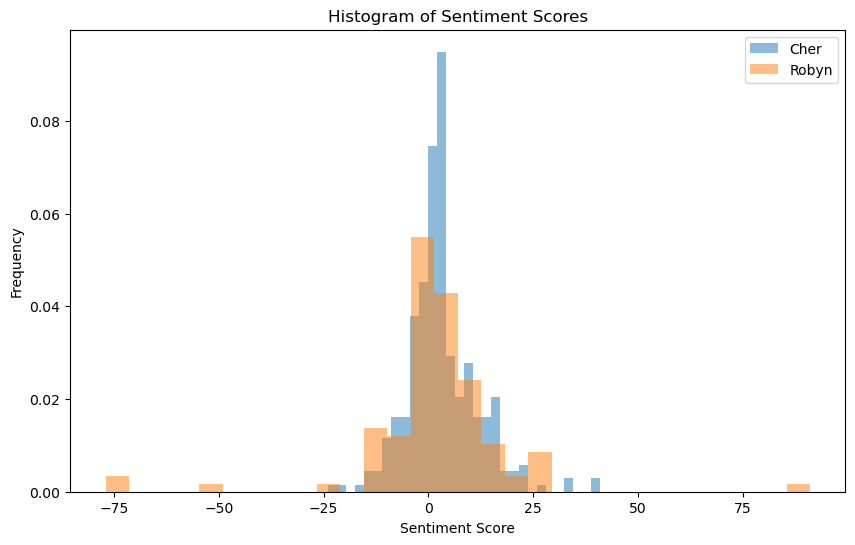

In [56]:
# histogram using matplotlib
plt.figure(figsize=(10, 6))
plt.hist(cher_songs['sentiment_score'], bins=30, alpha=0.5, label='Cher', density=True)
plt.hist(robyn_songs['sentiment_score'], bins=30, alpha=0.5, label='Robyn', density=True)
plt.title('Histogram of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

## Sentiment Analysis on Twitter Descriptions

In this section, define two sets of emojis you designate as positive and negative. Make sure to have at least 10 emojis per set. You can learn about the most popular emojis on Twitter at [the emojitracker](https://emojitracker.com/). 

Associate your positive emojis with a score of +1, negative with -1. Score the average sentiment of your two artists based on the Twitter descriptions of their followers. The average sentiment can just be the total score divided by number of followers. You do not need to calculate sentiment on non-emoji content for this section.

In [63]:
# your code here

# get all emojis from each of the twitter texts if its in the emoji data
def extract_emojis(text):
    return [char for char in text if char in emoji.EMOJI_DATA]

cher_emojis = extract_emojis(cher_twitter)
robyn_emojis = extract_emojis(robyn_twitter)

print(cher_emojis)
print(robyn_emojis)

['💜', '🍒', '💓', '🧡', '😇', '🖤', '✨', '🧩', '🌻', '💕', '✝', '🙃', '✨', '🏳', '🌈', '☂', '🔴', '🔥', '🔥', '🌎']
['♥', '🌱', '🤡', '🌸', '🌈', '🌹', '🎵', '🌈', '🦖', '🐧', '🥑', '🏳', '🌈', '🚀', '🐕', '👀', '🐕', '🚀', '🔥', '🔥', '🐢', '🐢', '🔥', '🔥', '😊', '✌', '🌈', '☮', '💯', '💜', '🌹', '💎', '🎧', '🙏', '▶', '🎙', '🎧', '🔊', '♍', '❤', '🖕', '🖕', '🧣', '💛', '💛']


In [64]:
# here i will manually define some positive or negative emojis
positive_emojis = {'😊', '😍', '😂', '🥰', '😎', '👍', '🔥', '🌟','😇','💜'}
negative_emojis = {'😢', '😠', '💔', '👎', '😞', '😡', '😭', '🖕'}

In [66]:
# function to get the average scores for each list of emojis
def calculate_sentiment_score(emojis):

    # set default score to 0
    score = 0

    # for each emoji
    for e in emojis:

        # if its in the positive emoji list
        if e in positive_emojis:

            # add one to the score
            score += 1

        # else if its in the negative emojis list    
        elif e in negative_emojis:

            # subtract by 1
            score -= 1
    return score

cher_score = calculate_sentiment_score(cher_emojis)
robyn_score = calculate_sentiment_score(robyn_emojis)

print(cher_score)
print(robyn_score)

4
4


Q: What is the average sentiment of your two artists? 

A: both artists sentiment score is about the same, at 4

---

Q: Which positive emoji is the most popular for each artist? Which negative emoji? 

A: the 🔥 emoji appears quite a bit for both artists while there doesnt seem to be a overly popular negative emoji from the small sample size.

